# Q & A

Algunas de las siguientes son la correlación que existe entre ciertas variables, pero para este caso, este análisis de correlaciones no incluye el uso de Aprendizaje No Supervisado para observar patrones, eso es en otro notebook específico de Aprendizaje No Supervisado.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [2]:
df = pd.read_csv('../data/processed/moods_2024_2025.csv')

In [3]:
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

## 1. Relación entre la sensación de descanso con el ánimo

**sleep_level**:
- Sin dormir: 0
- Sueño malo: 1
- Sueño medio: 2
- Buen sueño: 3
- Sueño temprano: 4
---
**mood**:
- Horrible: 0
- Mal: 1
- Meh: 2
- Bien: 3
- Increíble: 4

In [4]:
print(df[['mood_numeric', 'sleep_level_numeric']].describe(), "\n")
print(df[['mood', 'sleep_level']].describe())

print("\n Good days stats")
good_days = df[(df['mood'] == 'Increíble') | (df['mood'] == 'Bien')]
print(good_days[['mood_numeric', 'sleep_level_numeric']].describe(), "\n")
print(good_days[['mood', 'sleep_level']].describe())

       mood_numeric  sleep_level_numeric
count    545.000000           545.000000
mean       2.783486             2.328440
std        0.610044             0.759994
min        0.000000             0.000000
25%        3.000000             2.000000
50%        3.000000             2.000000
75%        3.000000             3.000000
max        4.000000             4.000000 

        mood sleep_level
count    545         545
unique     5           5
top     Bien  Buen sueño
freq     401         263

 Good days stats
       mood_numeric  sleep_level_numeric
count    427.000000           427.000000
mean       3.060890             2.384075
std        0.239409             0.733203
min        3.000000             0.000000
25%        3.000000             2.000000
50%        3.000000             3.000000
75%        3.000000             3.000000
max        4.000000             4.000000 

        mood sleep_level
count    427         427
unique     2           5
top     Bien  Buen sueño
freq     401   

In [5]:
sleep_order = ['Sueño temprano', 'Buen sueño', 'Sueño medio', 'Sueño malo', 'Sin dormir']
mood_order = ['Increíble', 'Bien', 'Meh', 'Mal', 'Horrible']

result = pd.crosstab(df['sleep_level'], df['mood'], margins=True, margins_name='Total')
result_sorted = result.reindex(index=sleep_order + ['Total'], columns=mood_order + ['Total'])

print("Frequency by mood and sleep_level")
result_sorted

Frequency by mood and sleep_level


mood,Increíble,Bien,Meh,Mal,Horrible,Total
sleep_level,,,,,,
Sueño temprano,0,2,0,0,0,2
Buen sueño,12,206,34,10,1,263
Sueño medio,7,146,39,5,2,199
Sueño malo,6,44,20,4,0,74
Sin dormir,1,3,2,1,0,7
Total,26,401,95,20,3,545


In [6]:
prop_by_sleep = result.reindex(index=sleep_order, columns=mood_order)
prop_by_sleep = prop_by_sleep.div(prop_by_sleep.sum(axis=1), axis=0) * 100

print("sleep_level proportion")
prop_by_sleep.round(1)

sleep_level proportion


mood,Increíble,Bien,Meh,Mal,Horrible
sleep_level,,,,,
Sueño temprano,0.0,100.0,0.0,0.0,0.0
Buen sueño,4.6,78.3,12.9,3.8,0.4
Sueño medio,3.5,73.4,19.6,2.5,1.0
Sueño malo,8.1,59.5,27.0,5.4,0.0
Sin dormir,14.3,42.9,28.6,14.3,0.0


In [7]:
prop_by_mood = result.reindex(index=sleep_order, columns=mood_order)
prop_by_mood = prop_by_mood.div(prop_by_mood.sum(axis=0), axis=1) * 100

print("mood proportion")
prop_by_mood.round(1)

mood proportion


mood,Increíble,Bien,Meh,Mal,Horrible
sleep_level,,,,,
Sueño temprano,0.0,0.5,0.0,0.0,0.0
Buen sueño,46.2,51.4,35.8,50.0,33.3
Sueño medio,26.9,36.4,41.1,25.0,66.7
Sueño malo,23.1,11.0,21.1,20.0,0.0
Sin dormir,3.8,0.7,2.1,5.0,0.0


In [8]:
# Kendall is useful for ordinal data or when the data has ties (i.e., when several items have the same value).

correlacion = df['sleep_level_numeric'].corr(df['mood_numeric'], method='kendall')
print(f"Correlation between sleep_level and mood: {correlacion:.2f}")

Correlation between sleep_level and mood: 0.09


In [9]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['mood'], df['sleep_level'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v_value = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"\nChi ^2: mood & sleep_level: {chi2:.2f}")
print(f"P-valor: {p:.4f}")
print(f"Cramer's V: mood & sleep_level: {cramers_v_value:.2f}")


Chi ^2: mood & sleep_level: 20.99
P-valor: 0.1787
Cramer's V: mood & sleep_level: 0.10


Las clases que más se repiten son `Bien` y `Buen sueño` para `mood` y `sleep_level`, con una frecuencia de 340 y 215, y 340 y 179 los buenos días (`Increíble` y `Bien`) respectivamente.
También en base a la información anterior, se puede observar que hay una proporción más inclinada a estos registros, es decir, que en la mayoría de casos, no importa qué `mood` se tenga, la mayoría de veces se encontrará `Buen sueño`, e igual para `sleep_level` se encontrará `Bien`.
Finalmente, se midió la correlación entre estas con el método de *Kendall* ya que este es útil para datos ordinales con resultados de -1 a 1. Para este caso se obtuvo un **0.11** el cual podría indicar una relación muy baja entre estas 2 variables.
Para fortalecer este resultado se midió la correlación con *Cramer's V* perfecto para variables categóricas, obteniendo un **Chi^2 = 25.95**, **P-valor = 0.0548** y **Cramer's V = 0.12**. Resumiendo que aunque el P-valor da un resultado cercano a ser menor a 0.05 no es suficiente para decir que hay relación real, igualmente indicado por Cramer´s V con 0.12 que indica una correlación muy débil.

En conclusión, a partir de los resultados obtenidos de la estadística descriptiva y de las correlaciones, se puede decir que no se encuentra una relación real entre la calidad de sueño percibida con el nivel de ánimo (<ins>al menos para esta muestra</ins>).

## 2. Relación de actividades con emociones positivas, neutras y negativas

In [10]:
df.iloc[:, 12:22].describe()

,activities_count,emotions_count,health_count,productivity_count,places_count,tasks_count,school_count,positive_emotions_count,neutral_emotions_count,negative_emotions_count
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,8.864220,3.897248,1.972477,1.033028,0.242202,0.330275,0.370642,2.458716,0.407339,1.031193
std,2.968571,1.487847,1.700231,1.143561,0.510963,0.636729,0.692834,1.265580,0.577728,1.330130
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,11.000000,5.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000
max,21.000000,10.000000,6.000000,7.000000,3.000000,3.000000,4.000000,6.000000,2.000000,9.000000


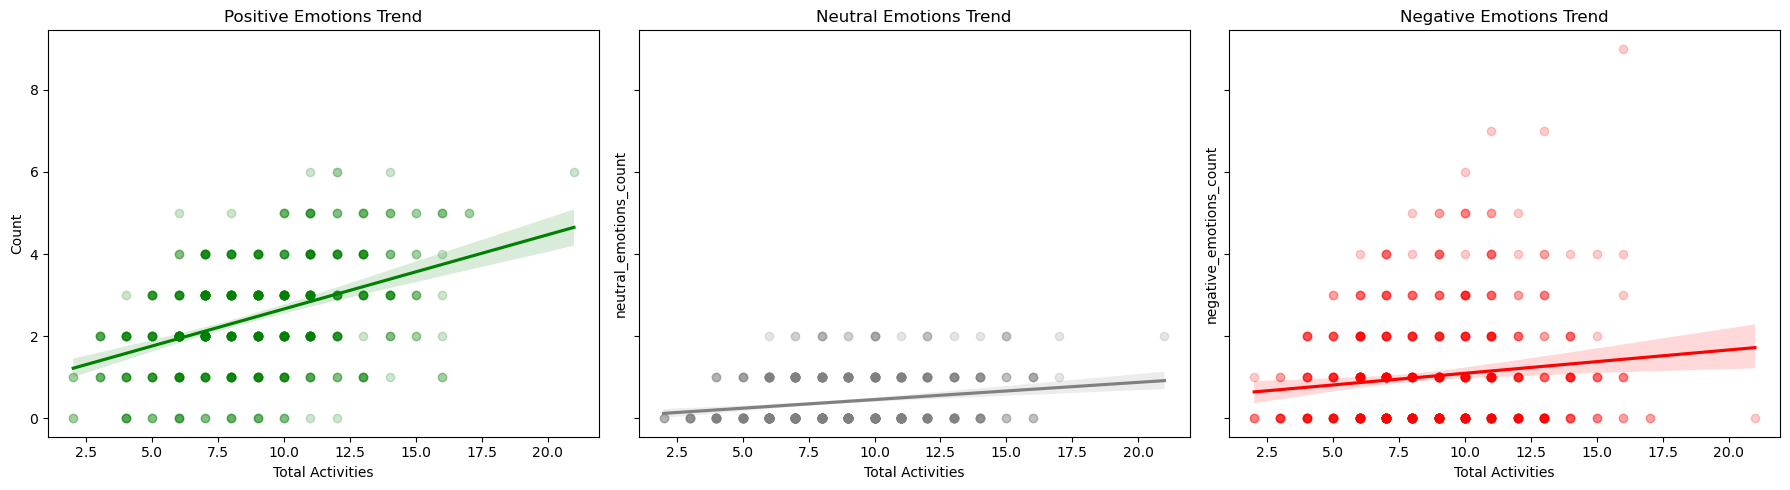

In [11]:
x = df['activities_count']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.regplot(x=x, y=df['positive_emotions_count'], ax=axes[0], 
            color='green', scatter_kws={'alpha':0.2})
axes[0].set_title('Positive Emotions Trend')
axes[0].set_xlabel('Total Activities')
axes[0].set_ylabel('Count')

sns.regplot(x=x, y=df['neutral_emotions_count'], ax=axes[1], 
            color='gray', scatter_kws={'alpha':0.2})
axes[1].set_title('Neutral Emotions Trend')
axes[1].set_xlabel('Total Activities')

sns.regplot(x=x, y=df['negative_emotions_count'], ax=axes[2], 
            color='red', scatter_kws={'alpha':0.2})
axes[2].set_title('Negative Emotions Trend')
axes[2].set_xlabel('Total Activities')

plt.tight_layout()
plt.show()

In [12]:
# Proportion of each emotion
df['positive_proportion'] = df['positive_emotions_count'] / df['emotions_count']
df['neutral_proportion'] = df['neutral_emotions_count'] / df['emotions_count']
df['negative_proportion'] = df['negative_emotions_count'] / df['emotions_count']

df[['positive_proportion', 'neutral_proportion', 'negative_proportion']].describe()

,positive_proportion,neutral_proportion,negative_proportion
count,544.000000,544.000000,544.000000
mean,0.667147,0.097082,0.235771
std,0.297734,0.144749,0.270635
min,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000
50%,0.666667,0.000000,0.200000
75%,1.000000,0.200000,0.400000
max,1.000000,0.666667,1.000000


In [13]:
total_pos = df['positive_emotions_count'].sum()
total_neu = df['neutral_emotions_count'].sum()
total_neg = df['negative_emotions_count'].sum()
total_global = df['emotions_count'].sum()

print(f"Global positive proportion: {total_pos / total_global:.2%}")
print(f"Global neutral proportion: {total_neu / total_global:.2%}")
print(f"Global negative proportion: {total_neg / total_global:.2%}")

Global positive proportion: 63.09%
Global neutral proportion: 10.45%
Global negative proportion: 26.46%


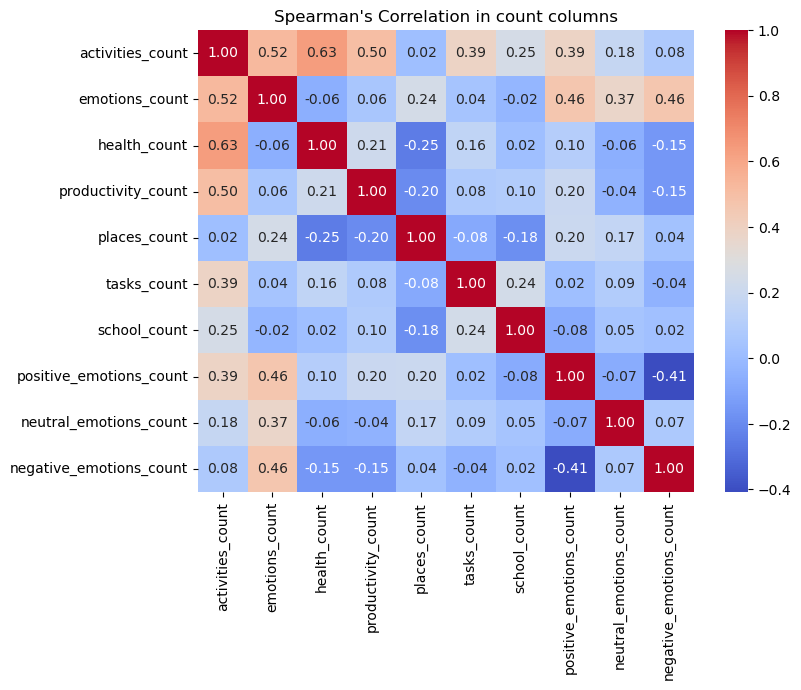

In [14]:
corr_count_cols = df.iloc[:, 12:22].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_count_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Correlation in count columns")
plt.show()

In [15]:
# Point-Biserial
onehot_activities = df.columns[22:86] 
emotions = ['positive_emotions_count', 'neutral_emotions_count', 'negative_emotions_count']

results = []

for activity in onehot_activities:
    for emotion in emotions:
        
        correlation, p_value = pointbiserialr(df[activity], df[emotion])
        
        results.append({
            'Actividad': activity,
            'Emocion': emotion,
            'Correlacion': correlation,
            'P-Value': p_value
        })

df_pb = pd.DataFrame(results)

# 4. Filtrar solo las que son realmente importantes (Corr > 0.3 y que sean significativas)
# Un p-value < 0.05 indica que la relación no es por azar
key_findings = df_pb[(df_pb['Correlacion'].abs() > 0.4) & (df_pb['P-Value'] < 0.05)]

key_findings.sort_values(by='Correlacion', ascending=False)

,Actividad,Emocion,Correlacion,P-Value
19,Cansado,neutral_emotions_count,0.753617,5.096745e-101
96,Feliz,positive_emotions_count,0.593109,4.392203e-53
42,Contento,positive_emotions_count,0.576413,1.426763e-49
133,Ocupado,neutral_emotions_count,0.572030,1.104617e-48
11,Ansioso,negative_emotions_count,0.567056,1.085459e-47
126,Motivado,positive_emotions_count,0.541848,6.546673e-43
147,Productivo,positive_emotions_count,0.531301,4.996186e-41
86,Estresado,negative_emotions_count,0.527692,2.126886e-40
80,Enojado,negative_emotions_count,0.480327,8.375135e-33
53,Decepcionado,negative_emotions_count,0.463990,1.901390e-30


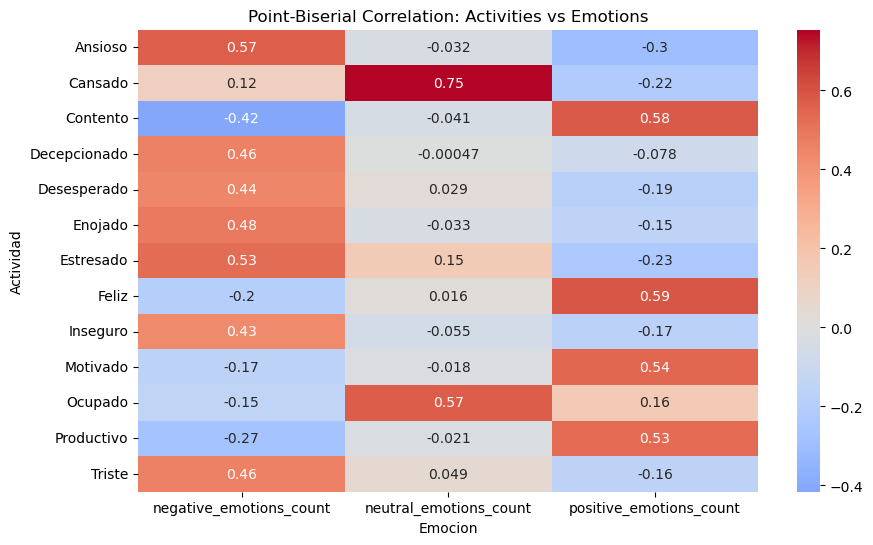

In [16]:
pivot_pb = df_pb.pivot(index='Actividad', columns='Emocion', values='Correlacion')

relevant = pivot_pb[pivot_pb.abs().max(axis=1) > 0.4]

plt.figure(figsize=(10, 6))
sns.heatmap(relevant, annot=True, cmap='coolwarm', center=0)
plt.title("Point-Biserial Correlation: Activities vs Emotions")
plt.show()

En promedio, se registran aproximadamente **4 emociones** de las cuales la mayoría son positivas.
De manera similar como se puede observar en el scatter plot, más claramente para las emociones positivas, entre más cantidad de actividades se hagan, mayor es el número de emociones positivas que se sienten.
Contando las proporciones medias por emociones y la suma global de estas se tienen los siguientes resultados:
- Proporción de emociones positivas: **61.41% - 64.39%**
- Proporción de emociones neutras: **10.52% - 11.07%**
- Proporción de emociones negativas: **25.07% - 27.52%**

Resumiendo lo anterior se puede decir que mayormente se registran emociones positivas, seguido de negativas y muy poco de neutras.

Luego, para las columnas de conteo (incluyendo las de categorías/agrupación) se hizo la correlación de Spearman, pero no se ven correlaciones fuertes, pero algunas de ellas son:
- A mayor cantidad de actividades, más actividades de salud hay
- A mayor cantidad de actividades, más actividades de productividad hay
- A mayor cantidad de emociones positivas haya, menor hay de emociones negativas

Pero estas correlaciones realmente no nos dicen nada, ya que de las categorías, `health` y `productivity` son las que más actividades tienen, por lo que es lógico que entre más actividades de estas categorías haya, mayor será el número de actividades hechas.
Así mismo entre más actividades positivas haya, menor serán las negativas.
Pero estos comportamientos se analizarán más adelante.

Finalmente, se calculan relaciones Point-Biserial con las emociones y las actividades para ver otro tipo de correlación.
A pesar de que no haya correlaciones muy fuertes y el P-value lo afirme, intuitivamente se puede ver que realmente sí hay una cierta correlación. Por ejemplo, **`Feliz` con emociones postivas, `Cansado` con emociones neutras, y `Ansioso` con emociones negativas**.
Lo que nos indica de que aunque no haya resultados demasiado acertados matemáticamente, la correlación más confiable entre actividades y emociones es Point-Biserial.

## 3. Influencia de actividades con el ánimo

In [17]:
activity_cols = df.columns[22:86]

prevalence_df = df.groupby('mood')[activity_cols].mean()

prevalence_df = prevalence_df.T

print("Top activities during 'Increíble' days")
print(prevalence_df['Increíble'].sort_values(ascending=False).head(8))

print("\nTop activities during 'Bien' days")
print(prevalence_df['Bien'].sort_values(ascending=False).head(8))

print("\nTop activities during 'Meh' days")
print(prevalence_df['Meh'].sort_values(ascending=False).head(8))

print("\nTop activities during 'Mal' days")
print(prevalence_df['Mal'].sort_values(ascending=False).head(8))

print("\nTop activities during 'Horrible' days")
print(prevalence_df['Horrible'].sort_values(ascending=False).head(8))

Top activities during 'Increíble' days
Feliz         0.961538
Contento      0.961538
Emocionado    0.615385
Salida        0.576923
Relajado      0.500000
Buen sueño    0.461538
Skin care     0.269231
Enamorado     0.269231
Name: Increíble, dtype: float64

Top activities during 'Bien' days
Contento      0.925187
Relajado      0.750623
Skin care     0.518703
Buen sueño    0.513716
Agua          0.498753
Comer sano    0.488778
Ejercicio     0.403990
Feliz         0.389027
Name: Bien, dtype: float64

Top activities during 'Meh' days
Relajado       0.694737
Contento       0.526316
Sueño medio    0.410526
Skin care      0.389474
Buen sueño     0.357895
Estresado      0.347368
Cansado        0.336842
Comer sano     0.326316
Name: Meh, dtype: float64

Top activities during 'Mal' days
Relajado      0.55
Buen sueño    0.50
Contento      0.45
Ansioso       0.45
Estresado     0.45
Skin care     0.45
Enojado       0.40
Cansado       0.40
Name: Mal, dtype: float64

Top activities during 'Horrible' d

In [18]:
def get_mood_lift(df, activity):
    active_mood = df[df[activity] == 1]['mood_numeric'].mean()
    inactive_mood = df[df[activity] == 0]['mood_numeric'].mean()
    lift = active_mood - inactive_mood
    return lift

lift_results = []
for activity in activity_cols:
    lift_results.append({
        'Activity': activity,
        'Mood_Lift': get_mood_lift(df, activity)
    })

mood_lift_df = pd.DataFrame(lift_results).sort_values(by='Mood_Lift', ascending=False)

print("Top 5 Activities that Increase Mood the Most:")
print(mood_lift_df.head(10))

print("\nTop 5 Activities that Decrease Mood the Most:")
print(mood_lift_df.tail(10))

Top 5 Activities that Increase Mood the Most:
           Activity  Mood_Lift
15     Conversación   1.220994
14         Contento   0.708112
45              Paz   0.628037
4         Bicicleta   0.600326
32            Feliz   0.415450
22       Emocionado   0.404658
55           Salida   0.380624
30           Evento   0.379410
23        Enamorado   0.348525
16  Correr / Cardio   0.284202

Top 5 Activities that Decrease Mood the Most:
        Activity  Mood_Lift
0       Aburrido  -0.522376
18   Desesperado  -0.547623
28     Estresado  -0.583830
41         Miedo  -0.683665
47    Preocupado  -0.706844
19   Desmotivado  -0.752794
46     Pensativo  -0.796642
17  Decepcionado  -0.799159
26       Enojado  -0.801728
62        Triste  -1.053277


## 4. Relación entre productividad y el ánimo

## 5. Encontrar rutinas positivas o negativas analizando combinaciones frecuentes de actividades y emociones

## 6. Recomendación de actividades ante situaciones adversas